Potential resource(s):
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

# Mental Health in Tech Project

## Data Sets

[OSMI Survey on Mental Health in the Tech Workplace in 2014](https://www.kaggle.com/osmi/mental-health-in-tech-survey) 

["Ongoing" OSMI survey from 2016](https://data.world/kittybot/osmi-mental-health-tech-2016)


## Questions

What factors are most signficant in influencing whether or not a person believes disclosing a mental health issue would have negative consequences?

Can we predict, based on publicly available features of a person and company, whether that person is likely to beleive disclosing a mental health issue would be harmful for their career?

## Exploring and Cleaning 2014 Data

In [1]:
import pandas as pd

In [2]:
df14 = pd.read_csv("./datasets/2014/clean-no-dummies-2014.csv", index_col=0)
df14['year'] = '2014'
print df14.shape
df14.head(3)

(1259, 29)


,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,gender_category,year
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,0,1,often,6-25,...,no,some_of_them,yes,no,maybe,yes,0,NaN,female,2014
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,0,0,rarely,1000+,...,no,no,no,no,no,dont_know,0,NaN,male,2014
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,0,0,rarely,6-25,...,no,yes,yes,yes,yes,no,0,NaN,male,2014


In [3]:
df16 = pd.read_csv("./datasets/2016/clean-no-dummies-2016.csv", index_col=0)
df16['year'] = '2016'
print df16.shape
df16.head(3)

(1433, 67)


,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,live_in_country,live_in_state,work_in_country,work_in_state,position,remote_work,gender_category,state,country,year
0,0,26-100,1.0,NaN,doesnt_apply,NaN,no,no,dont_know,very_easy,...,united_kingdom,NaN,united_kingdom,NaN,Back-end Developer,sometimes,male,NaN,united_kingdom,2016
1,0,6-25,1.0,NaN,no,yes,yes,yes,yes,somewhat_easy,...,united_states,il,united_states,il,Back-end Developer|Front-end Developer,never,male,il,united_states,2016
2,0,6-25,1.0,NaN,no,NaN,no,no,dont_know,neither_easy_nor_difficult,...,united_kingdom,NaN,united_kingdom,NaN,Back-end Developer,always,male,NaN,united_kingdom,2016


In [7]:
# print df14.columns
# print df16.columns
colset14 = set(df14.columns)
colset16 = set(df16.columns)
# print colset14 - colset16
# print colset16 - colset14

#### NaN Check


In [8]:
df16.head(1)

,self_employed,num_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,live_in_country,live_in_state,work_in_country,work_in_state,position,remote_work,gender_category,state,country,year
0,0,26-100,1.0,NaN,doesnt_apply,NaN,no,no,dont_know,very_easy,...,united_kingdom,NaN,united_kingdom,NaN,Back-end Developer,sometimes,male,NaN,united_kingdom,2016


In [9]:
df14.head(1)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,gender_category,year
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,0,1,often,6-25,...,no,some_of_them,yes,no,maybe,yes,0,NaN,female,2014


In [10]:
usdf14 = df14[df14['country']=="United States"]
usdf14.shape

(751, 29)

In [11]:
usdf16 = df16[df16['country']=="united_states"]
usdf16.shape

(837, 67)

In [12]:
usdf = pd.concat([usdf14, usdf16], axis=0)
usdf['country'] = "United States"
usdf['country'].value_counts(dropna=False)
print usdf.shape
usdf.head(2)


(1588, 70)


,age,anonymity,believed_conditions,benefits,care_options,comments,country,coworkers,current_disorder,diagnosed_conditions,...,timestamp,treatment,viewed_negatively,wellness_program,work_in_country,work_in_state,work_interfere,work_interfere_treated,work_interfere_untreated,year
0,37.0,yes,NaN,yes,not_sure,NaN,United States,some_of_them,NaN,NaN,...,2014-08-27 11:29:31,1,NaN,no,NaN,NaN,often,NaN,NaN,2014
1,44.0,dont_know,NaN,dont_know,no,NaN,United States,no,NaN,NaN,...,2014-08-27 11:29:37,0,NaN,dont_know,NaN,NaN,rarely,NaN,NaN,2014


In [76]:
# print '2014 null data'
# counts = usdf14.count()
# numrows = usdf14.shape[0]
# for col in usdf14.columns:
#     if counts[col] != numrows:
#         print "{0} - {1}".format(col, numrows-counts[col])
        
# print '\n2016 null data'
# counts = usdf16.count()
# numrows = usdf16.shape[0]
# for col in usdf16.columns:
#     if counts[col] != numrows:
#         print "{0} - {1}".format(col, numrows-counts[col])

In [77]:
# print 'null data'
# counts = usdf.count()
# numrows = usdf.shape[0]
# for col in usdf.columns:
#     if counts[col] != numrows:
#         print "{0} - {1}".format(col, numrows-counts[col])

In [66]:
usdf.viewed_negatively.value_counts(dropna=False)

NaN           751
maybe         336
yes_would     250
no_wouldnt    195
no_dont        30
yes_do         26
Name: viewed_negatively, dtype: int64

In [20]:
def work_interfere_yesno (row):
    if row['work_interfere'] == 'never' or row['work_interfere_treated'] == 'never' or row['work_interfere_untreated'] == 'never'  :
        return 0
    elif row['work_interfere'] == 'doesnt_apply' or row['work_interfere_treated'] == 'doesnt_apply' or row['work_interfere_untreated'] == 'doesnt_apply':
        return float('NaN')
    return 1
    

In [21]:
df = usdf.copy()
df['work_interfere_bool'] = df.apply(work_interfere_yesno, axis=1)#.value_counts(dropna=False)
df.head(2)

,age,anonymity,believed_conditions,benefits,care_options,comments,country,coworkers,current_disorder,diagnosed_conditions,...,treatment,viewed_negatively,wellness_program,work_in_country,work_in_state,work_interfere,work_interfere_treated,work_interfere_untreated,year,work_interfere_bool
0,37.0,yes,NaN,yes,not_sure,NaN,United States,some_of_them,NaN,NaN,...,1,NaN,no,NaN,NaN,often,NaN,NaN,2014,1.0
1,44.0,dont_know,NaN,dont_know,no,NaN,United States,no,NaN,NaN,...,0,NaN,dont_know,NaN,NaN,rarely,NaN,NaN,2014,1.0


In [22]:
def mental_health_consequence_yesno (row):
    if row['mental_health_consequence'] == 'no':
        return 0
    elif row['mental_health_consequence'] == 'maybe' or row['mental_health_consequence'] == 'yes':
        return 1
    else:
        return float('NaN')

In [100]:
df['mental_health_consequence_bool'] = df.apply(mental_health_consequence_yesno, axis=1)
df.head(2)
print df['mental_health_consequence'].value_counts()
print df['mental_health_consequence_bool'].value_counts()

maybe    607
no       542
yes      310
Name: mental_health_consequence, dtype: int64
1.0    917
0.0    542
Name: mental_health_consequence_bool, dtype: int64


### Frequency of each response within a column

In [24]:
segment = usdf.copy()
col = 'mental_health_consequence'
num_responses = segment.shape[0]
count_series = segment[col].value_counts(dropna=False)
print num_responses
count_series.loc[:] = count_series / num_responses
print count_series

1588
maybe    0.382242
no       0.341310
yes      0.195214
NaN      0.081234
Name: mental_health_consequence, dtype: float64


### Number of responses by age

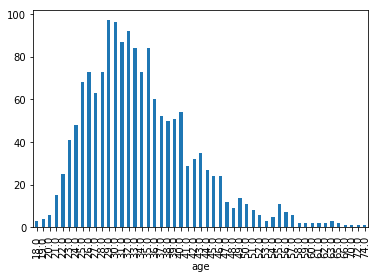

In [182]:
%matplotlib inline
counts = df[['age', 'gender_category']].groupby('age').count()
counts.plot(kind='bar',legend=False)

### Frequency of mental health consequences (yes or maybe) by age (unfinished)

In [159]:
# df[['age', 'mental_health_consequence_bool']].groupby(['age', 'mental_health_consequence_bool']).count()
grouped = df.groupby(['age', 'mental_health_consequence_bool']).size()
print '18 age group series'
print grouped[18.0]
print grouped[18.0].count()
print 'number of mental health consequence bool trues in 18 age group'
print grouped[18.0][1.0]
type(grouped)
grouped

18 age group series
mental_health_consequence_bool
0.0    2
1.0    1
dtype: int64
2
number of mental health consequence bool trues in 18 age group
1


age   mental_health_consequence_bool
18.0  0.0                                2
      1.0                                1
19.0  0.0                                2
      1.0                                1
20.0  0.0                                4
      1.0                                1
21.0  0.0                                4
      1.0                               10
22.0  0.0                                8
      1.0                               16
23.0  0.0                               17
      1.0                               24
24.0  0.0                               23
      1.0                               23
25.0  0.0                               21
      1.0                               42
26.0  0.0                               20
      1.0                               50
27.0  0.0                               24
      1.0                               37
28.0  0.0                               25
      1.0                               47
29.0  0.0        

### Frequency of mental health consequences 'yes' by age (unfinished)

In [140]:
 grouped = df.groupby(['age', 'mental_health_consequence'])

In [153]:
def printone():
    for thing in grouped:
        return thing

In [158]:
a = printone()
print a[0]
a[1]

(18.0, 'no')


,age,anonymity,believed_conditions,benefits,care_options,comments,country,coworkers,current_disorder,diagnosed_conditions,...,viewed_negatively,wellness_program,work_in_country,work_in_state,work_interfere,work_interfere_treated,work_interfere_untreated,year,work_interfere_bool,mental_health_consequence_bool
118,18.0,yes,NaN,no,no,NaN,United States,some_of_them,NaN,NaN,...,NaN,no,NaN,NaN,rarely,NaN,NaN,2014,1.0,0.0
287,18.0,dont_know,NaN,dont_know,not_sure,NaN,United States,some_of_them,NaN,NaN,...,NaN,dont_know,NaN,NaN,never,NaN,NaN,2014,0.0,0.0


### Other stuff


In [56]:
print usdf.shape
print usdf['year'].value_counts()
# usdf.notnull().sum().sort_values(ascending=False)

(1588, 70)
2016    837
2014    751
Name: year, dtype: int64


In [57]:
# (usdf16['live_in_state']==usdf16['work_in_state']).value_counts(dropna=False)

In [63]:
usdf.groupby('mental_health_consequence').get_group('yes').groupby('treatment').size()

treatment
0     98
1    212
dtype: int64

In [65]:
usdf.groupby(['treatment', 'mental_health_consequence']).size()

treatment  mental_health_consequence
0          maybe                        242
           no                           256
           yes                           98
1          maybe                        365
           no                           286
           yes                          212
dtype: int64

In [55]:
usdf.groupby(['gender_category', 'mental_health_consequence']).size()

gender_category  mental_health_consequence
female           maybe                        161
                 no                           119
                 yes                          101
male             maybe                        434
                 no                           419
                 yes                          201
other            maybe                         12
                 no                             4
                 yes                            8
dtype: int64

In [74]:
consy = usdf.groupby(['mental_health_consequence']).get_group('yes')
# consw = usdf.groupby(['mental_health_consequcne'])
consy.head(2)


,age,anonymity,believed_conditions,benefits,care_options,comments,country,coworkers,current_disorder,diagnosed_conditions,...,timestamp,treatment,viewed_negatively,wellness_program,work_in_country,work_in_state,work_interfere,work_interfere_treated,work_interfere_untreated,year
12,42.0,dont_know,NaN,yes,yes,NaN,United States,yes,NaN,NaN,...,2014-08-27 11:33:23,1,NaN,no,NaN,NaN,sometimes,NaN,NaN,2014
25,35.0,no,NaN,yes,yes,Sometimes I think about using drugs for my me...,United States,some_of_them,NaN,NaN,...,2014-08-27 11:37:08,1,NaN,no,NaN,NaN,sometimes,NaN,NaN,2014


# tease out diagnoses

In [ ]:
# 